<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Linear Support Vector Classification with Normalization & Quantile Transformer

This Code template is for classification analysis using the LinearSVC Classifier where rescaling method used is Normalize and feature transformation is done via Quantile Transformer.

### Required Packages

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, Normalizer, QuantileTransformer
from sklearn.metrics import classification_report, plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [ ]:
#filepath
file_path= ""

List of features which are  required for model training.

In [7]:
#x_values
features=[]

Target feature for prediction.

In [8]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [9]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [10]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [11]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,1,0
3,15603246,27,57000,1,0
4,15804002,19,76000,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

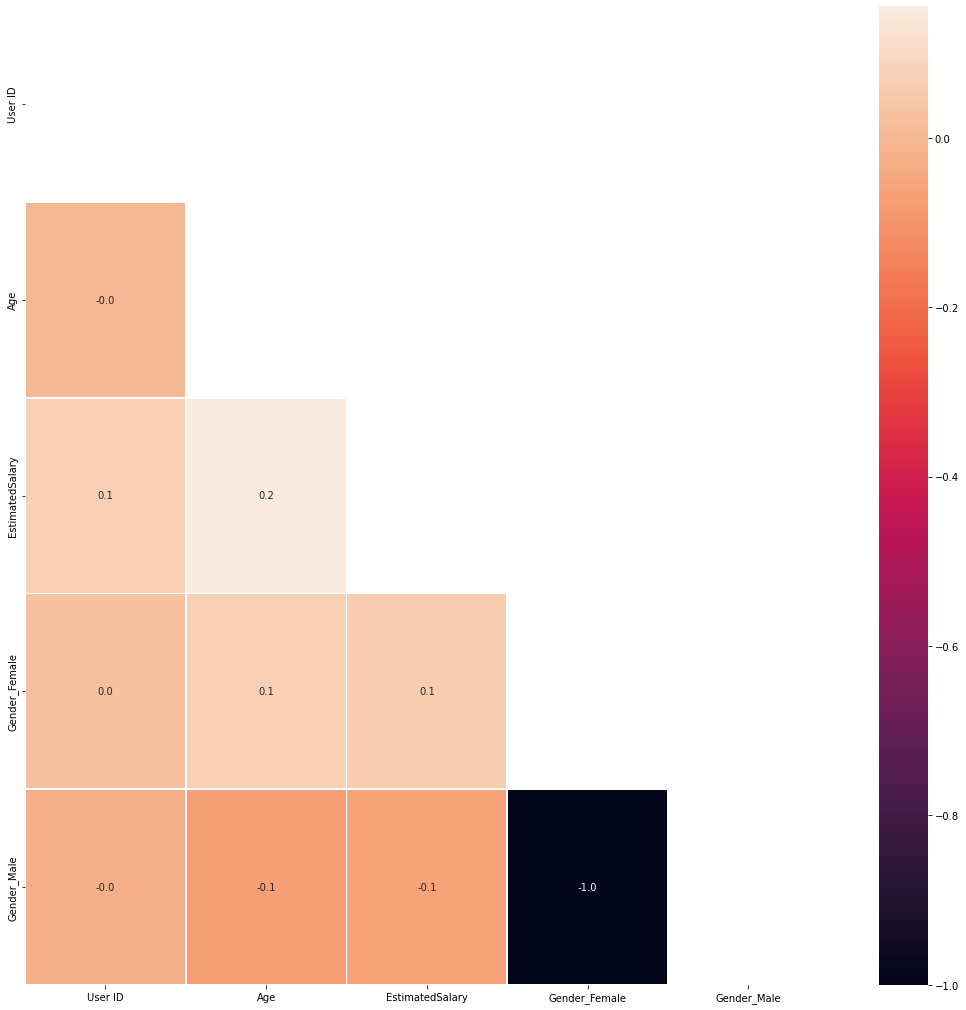

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

###Data Rescaling
Normalizer normalizes samples (rows) individually to unit norm.

Each sample with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

In [20]:
normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

### Quantile Transformer

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Transform features using quantiles information.

###Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.


####Model Tuning Parameters:


**penalty: {‘l1’, ‘l2’}, default=’l2’** ->
Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

**loss: {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’** ->
Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported.

**dual: bool, default=True** ->
Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

**tol: float, default=1e-4** ->
Tolerance for stopping criteria.

**C: float, default=1.0** ->
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

**multi_class: {‘ovr’, ‘crammer_singer’}, default=’ovr’** ->
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.

**fit_intercept: bool, default=True** ->
Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).

**intercept_scaling: float, default=1** ->
When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

**class_weight: dict or ‘balanced’, default=None** ->
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

**verbose: int, default=0** ->
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.

**random_state: int, RandomState instance or None, default=None** ->
Controls the pseudo random number generation for shuffling the data for the dual coordinate descent (if dual=True). When dual=False the underlying implementation of LinearSVC is not random and random_state has no effect on the results. Pass an int for reproducible output across multiple function calls. See Glossary.

**max_iter: int, default=1000** ->
The maximum number of iterations to be run.

In [21]:
model=make_pipeline(QuantileTransformer(), LinearSVC())
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [22]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 78.75 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

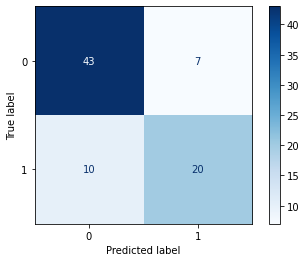

In [23]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

In [24]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.74      0.67      0.70        30

    accuracy                           0.79        80
   macro avg       0.78      0.76      0.77        80
weighted avg       0.78      0.79      0.79        80



#### Creator: Ayush Gupta , Github: [Profile](https://github.com/guptayush179)